In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
len(y_train)

60000

In [6]:
len(y_test)

10000

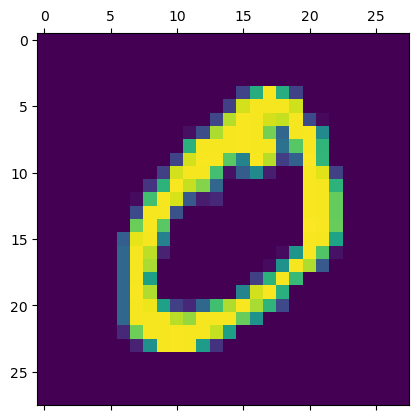

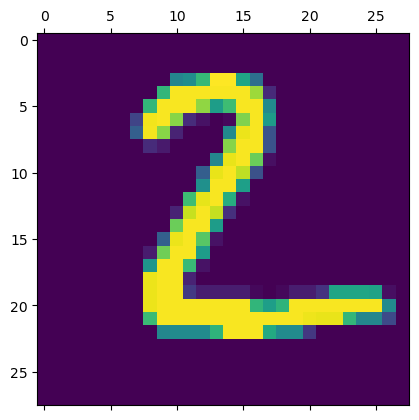

In [7]:
plt.matshow(X_train[1])
plt.matshow(X_test[1])

In [8]:
X_train=X_train / 255
X_test=X_test / 255 
#scaling is good for more accuracy
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
#To change 2d datas 1d data


In [9]:
model =keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
#
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9252


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9256


[0.26840803027153015, 0.925599992275238]

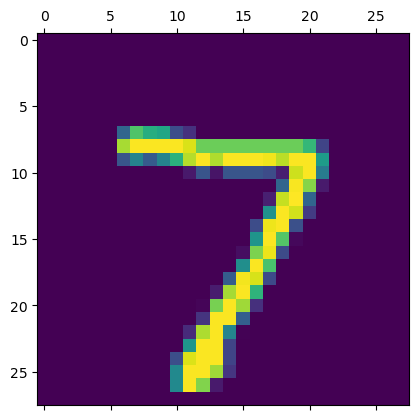

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 984us/step


array([2.9965568e-02, 4.2091125e-07, 6.2450014e-02, 9.4559318e-01,
       3.1252541e-03, 1.1326715e-01, 1.1641414e-06, 9.9982965e-01,
       7.2833255e-02, 5.5957758e-01], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels= [np.argmax(i) for i in y_predicted ]

Text(95.72222222222221, 0.5, 'Truth')

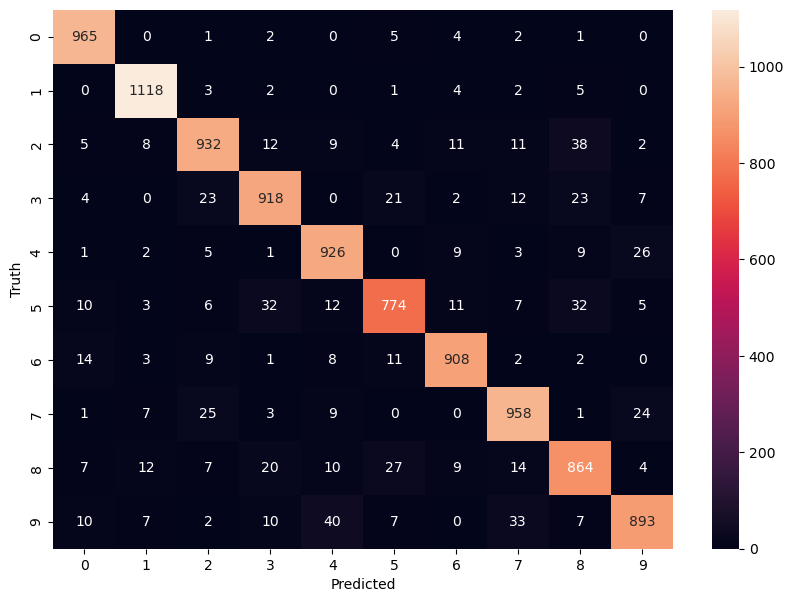

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
model =keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2706 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9834


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9740


[0.08290451020002365, 0.9739999771118164]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

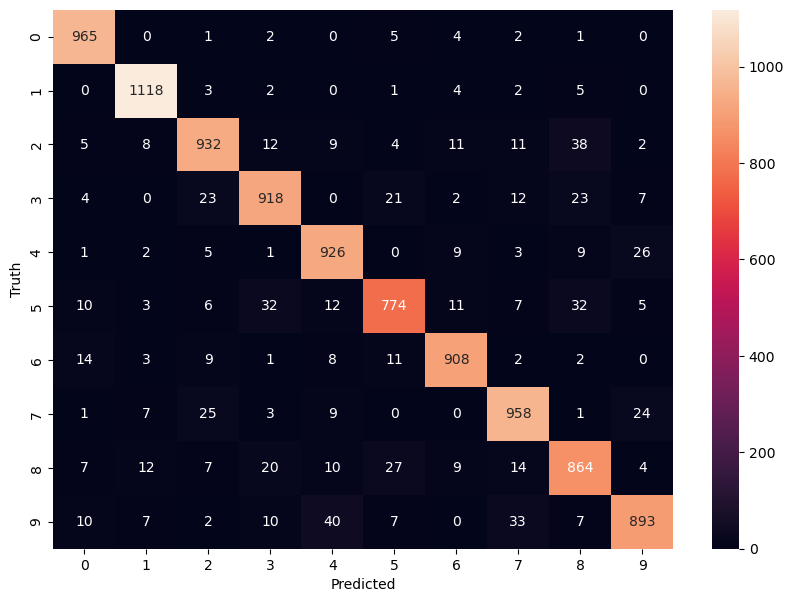

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
%reload_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 11300), started 0:00:08 ago. (Use '!kill 11300' to kill it.)